Data from https://www.iarc.who.int/

In [1]:
import pandas as pd
import numpy as np

import re

import warnings

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

# 1. Cleaning

#### Estimated number of new cases in 2020, melanoma of skin, non-melanoma skin cancer, both sexes, ages 20+

In [3]:
data1 = pd.read_csv('fbp_data1.csv')

In [4]:
data1

,population,number
0,World,1 517 814
1,United States of America,620 669
2,Germany,121 651
3,Canada,70 293
4,Australia,74 936
...,...,...
179,Solomon Islands,4
180,Vanuatu,4
181,Samoa,2
182,Guyana,2


In [5]:
data1.population.unique()

array(['World', 'United States of America', 'Germany', 'Canada',
       'Australia', 'United Kingdom', 'France', 'Brazil', 'Italy',
       'China', 'Spain', 'The Netherlands', 'Russian Federation',
       'Switzerland', 'Japan', 'India', 'New Zealand', 'Belgium',
       'Mexico', 'Poland', 'South Africa', 'Indonesia', 'Turkey',
       'Sweden', 'Ukraine', 'Ireland', 'Hungary', 'Pakistan', 'Argentina',
       'Austria', 'Venezuela, Bolivarian Republic of', 'Czechia',
       'Romania', 'Cuba', 'Korea, Republic of',
       'Iran, Islamic Republic of', 'Colombia', 'Peru', 'Thailand',
       'Nigeria', 'Denmark', 'Portugal', 'Chile', 'Norway', 'Ethiopia',
       'Finland', 'Greece', 'Bulgaria', 'Serbia', 'Myanmar', 'Egypt',
       'Kazakhstan', 'Belarus', 'Algeria', 'Viet Nam', 'Israel',
       'Croatia', 'Bangladesh', 'Costa Rica', 'Republic of Moldova',
       'Ecuador', 'Philippines', 'Uruguay', 'Slovakia', 'Mozambique',
       'Papua New Guinea', 'Angola', 'Tanzania, United Republic of'

> Number has '\xa' and it´s type object.

In [7]:
data1['population'] = data1['population'].str.replace('''CÃ´te d'Ivoire''', 'Ivory Coast')

In [8]:
data1['population'] = data1['population'].str.replace('''La RÃ©union''', 'Reunion')

In [6]:
data1['number'] = data1['number'].str.replace(u'\xa0', u'')

In [7]:
data1['number'] = data1['number'].astype(int)

In [8]:
# data1.isna().sum()

In [9]:
data1.to_csv('fbp_data1_2.csv')

> There are no NaN values.

#### Estimated age-standardized incidence rates (World) in 2020, melanoma of skin, non-melanoma skin cancer, both sexes, all ages

In [22]:
# data2 = pd.read_csv('fbp_data2.csv', encoding = 'ISO-8859-1')
data2 = pd.read_csv('fbp_data2.csv', encoding = 'cp1252')

In [23]:
data2.reset_index(inplace=True)

In [24]:
# data2

In [25]:
data2.drop(['Value'], axis = 1, inplace=True)

In [26]:
column_names = ['iso_code', 'population', 'value']
data2.columns = column_names

> I had this error: UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 104: invalid continuation byte, so I changed the enocding, but then it interpreted the first column as the index. So I renamed the columns and dropped the last one.

In [27]:
# data2.isna().sum()

> There are no NaNs.

In [28]:
# data2.dtypes

> The type of objects is correct.

In [29]:
# data2.population.unique()
# data2.value.unique()

> Population has values in a weird format. Probably because of the enoding.

In [30]:
# data2['population'] = data2['population'].str.replace(',', ', ')

In [31]:
# data2['population'] = data2['population'].str.replace('of$', ' of')

In [32]:
# data2['population'] = data2['population'].str.replace(r'([a-z])([A-Z])', r'\1 \2')

In [33]:
# data2['population'] = np.where(data2['population']=='''Côted'Ivoire''', 'Coted Ivoire', data2['population'])

In [34]:
# data2['population'] = np.where(data2['population']=='''Lao People's Democratic Republic''', '''Lao Peoples Democratic Republic''', data2['population'])

In [35]:
# data2['population'] = np.where(data2['population']=='''France, La Réunion''', '''France, La Reunion''', data2['population'])

> I´ll create a function for further use.

In [36]:
def clean_population(x):
    x = x.replace(',', ', ')
    x = re.sub(r'of$', ' of', x)
    x = x.replace('   ', ' ')
    x = re.sub(r'([a-z])([A-Z])', r'\1 \2', x)
    x = x.replace('''Côted'Ivoire''', 'Coted Ivoire')
    x = x.replace('''Lao People's Democratic Republic''', '''Lao Peoples Democratic Republic''')
    x = x.replace('''France, La Réunion''', '''France, La Reunion''')
    x = x.replace('''United Statesof America''', '''United States of America''')
    x = x.replace('''Viet Nam''', '''Vietnam''')
    x = x.replace('''Bosniaand Herzegovina''', '''Bosnia and Herzegovina''')
    x = x.replace('''Gaza Stripand West Bank''', '''Gaza Strip and West Bank''')
    x = x.replace('''Trinidadand Tobago''', '''Trinidad and Tobago''')
    return x

In [37]:
data2['population'] = data2['population'].apply(clean_population)

#### Estimated number of new cases in 2020, Spain, both sexes, ages 20+

In [38]:
data3 = pd.read_csv('fbp_data3.csv', encoding = 'cp1252')
data3.reset_index(inplace=True)

In [39]:
data3

,index,ICD,Cancer,Number,Uncertainty interval,Crude Rate,ASR (World),Cum. risk*
0,C00-97,Allcancers,280988,Notavailable,743.70,451.20,47.46,NaN
1,C18-21,Colorectum,40433,Notavailable,107.00,59.60,-,NaN
2,C61,Prostate,34611,Notavailable,188.60,117.60,16.22,NaN
3,C50,Breast,34085,Notavailable,175.40,129.10,11.66,NaN
4,C33-34,Lung,29185,Notavailable,77.20,48.30,6.22,NaN
5,C44,Non-melanomaskincancer,21956,Notavailable,58.10,21.10,6.21,NaN
6,C67,Bladder,18504,Notavailable,49.00,26.30,4.43,NaN
7,C64-65,Kidney,8495,Notavailable,22.50,14.50,1.81,NaN
8,C25,Pancreas,8208,Notavailable,21.70,11.40,2.01,NaN
9,"C82-86, C96",Non-Hodgkinlymphoma,8099,Notavailable,21.40,14.20,1.75,NaN


In [40]:
data3.drop(['Number', 'Uncertainty interval', 'Crude Rate', 'ASR (World)', 'Cum. risk*'], axis = 1, inplace=True)

column_names = ['icd', 'cancer', 'number']
data3.columns = column_names

In [34]:
# data3.isna().sum()

In [36]:
# data3.dtypes

In [42]:
# data3.cancer.unique()

In [41]:
def clean_type(x):
    x = x.replace('Allcancers', 'All cancers')
    x = x.replace('Non-melanomaskincancer', 'Non-melanoma skin cancer')
    x = x.replace('Hodgkinlymphoma', 'Hodgkin lymphoma')
    x = x.replace('Corpusuteri', 'Corpus uteri')
    x = x.replace('Melanomaofskin', 'Melanoma of skin')
    x = x.replace('Lip,oralcavity', 'Lip, oralcavity')
    x = x.replace('Brain,centralnervoussystem', 'Brain, central nervous system')
    x = x.replace('Multiplemyeloma', 'Multiple myeloma')
    x = x.replace('Cervixuteri', 'Cervix uteri')
    x = x.replace('Salivaryglands', 'Salivary glands')
    x = x.replace('Kaposisarcoma', 'Kaposi sarcoma')
    return x

In [42]:
data3['cancer'] = data3['cancer'].apply(clean_type)

#### Estimated number of new cases in 2020, World, both sexes, ages 20+

In [48]:
data4 = pd.read_csv('fbp_data4.csv', encoding = 'cp1252')
data4.reset_index(inplace=True)

In [51]:
data4

,icd,cancer,number
0,C00-97,Allcancers,19013370
1,C50,Breast,2260662
2,C33-34,Lung,2205692
3,C18-21,Colorectum,1929442
4,C61,Prostate,1414141
5,C44,Non-melanomaskincancer,1195182
6,C16,Stomach,1088010
7,C22,Liver,899961
8,C15,Oesophagus,603911
9,C53,Cervixuteri,603419


In [50]:
data4.drop(['Number', 'Uncertainty interval', 'Crude Rate', 'ASR (World)', 'Cum. risk*'], axis = 1, inplace=True)

column_names = ['icd', 'cancer', 'number']
data4.columns = column_names

In [46]:
data4['cancer'] = data4['cancer'].apply(clean_type)

In [47]:
data4.to_csv('fbp_data4_1.csv')

#### Estimated number of new cases from 2020 to 2040, Incidence, Both sexes, age [20-85+], Melanoma of skin


In [53]:
data5 = pd.read_csv('fbp_data5.csv')

In [54]:
data5

,Cancer id,Cancer label,Population id,Population,Sex,Type,Cases base in 2020,Year,Prediction,Change in number of cases,Change in number of cases due to population,Change in number of cases due to risk
0,16,Melanoma of skin,903,Africa,0,0,6797,2020,6797,0,0.0000,0
1,16,Melanoma of skin,903,Africa,0,0,6797,2025,8033,1236,18.1845,0
2,16,Melanoma of skin,903,Africa,0,0,6797,2030,9525,2728,40.1354,0
3,16,Melanoma of skin,903,Africa,0,0,6797,2035,11311,4514,66.4117,0
4,16,Melanoma of skin,903,Africa,0,0,6797,2040,13418,6621,97.4106,0
5,16,Melanoma of skin,904,Latin America and Caribbean,0,0,18713,2020,18713,0,0.0000,0
6,16,Melanoma of skin,904,Latin America and Caribbean,0,0,18713,2025,21486,2773,14.8186,0
7,16,Melanoma of skin,904,Latin America and Caribbean,0,0,18713,2030,24539,5826,31.1334,0
8,16,Melanoma of skin,904,Latin America and Caribbean,0,0,18713,2035,27872,9159,48.9446,0
9,16,Melanoma of skin,904,Latin America and Caribbean,0,0,18713,2040,31382,12669,67.7016,0


In [55]:
data5.drop(['Cancer id', 'Cancer label', 'Sex', 'Type', 'Change in number of cases', 'Change in number of cases due to population', 'Change in number of cases due to risk'], axis = 1, inplace=True)

In [56]:
data5 = data5.drop_duplicates(keep='last')

#### Estimated number of new cases from 2020 to 2040, Incidence, Both sexes, age [20-85+], Non-melanoma skin cancer


In [57]:
data6 = pd.read_csv('fbp_data6.csv')

In [58]:
data6.drop(['Cancer id', 'Cancer label', 'Sex', 'Type', 'Change in number of cases', 'Change in number of cases due to population', 'Change in number of cases due to risk'], axis = 1, inplace=True)

In [59]:
data6

,Population id,Population,Cases base in 2020,Year,Prediction
0,903,Africa,25728,2020,25728
1,903,Africa,25728,2025,30331
2,903,Africa,25728,2030,35931
3,903,Africa,25728,2035,42665
4,903,Africa,25728,2040,50574
5,904,Latin America and Caribbean,71126,2020,71126
6,904,Latin America and Caribbean,71126,2025,84139
7,904,Latin America and Caribbean,71126,2030,99358
8,904,Latin America and Caribbean,71126,2035,116924
9,904,Latin America and Caribbean,71126,2040,136217


# 2 - Wrangling

#### Estimated number of new cases from 2020 to 2040, Incidence, Both sexes, age [20-85+], Non-melanoma skin cancer and Melanoma of skin

> For this, I´ll need to merge data5 and data6 and sum columns. They are in the same order, so I don´t need to use the merge function, I can just add a new column.

In [60]:
data7 = data5.copy()

In [61]:
data7.drop(['Population id', 'Cases base in 2020'], axis = 1, inplace = True)

In [62]:
column_names = ['population', 'year', 'prediction_melanoma']
data7.columns = column_names
data7['prediction_other_skin'] = data6['Prediction']

In [63]:
data7['prediction'] = data7['prediction_melanoma'] + data7['prediction_other_skin']

In [64]:
data7

,population,year,prediction_melanoma,prediction_other_skin,prediction
0,Africa,2020,6797,25728,32525
1,Africa,2025,8033,30331,38364
2,Africa,2030,9525,35931,45456
3,Africa,2035,11311,42665,53976
4,Africa,2040,13418,50574,63992
5,Latin America and Caribbean,2020,18713,71126,89839
6,Latin America and Caribbean,2025,21486,84139,105625
7,Latin America and Caribbean,2030,24539,99358,123897
8,Latin America and Caribbean,2035,27872,116924,144796
9,Latin America and Caribbean,2040,31382,136217,167599


In [65]:
data7.to_csv('fbp_data7.csv')

# 3 - EDA

#### <font color='orange'>Question 1:</font> 
#### What are the countries with highest incidence of skin cancer?

In [114]:
data1_most = data1.sort_values(by = 'number', ascending=False)
data1_most = data1_most[data1_most['population'] != 'World'].reset_index(drop=True)
data1_most = data1_most.head(10)

Text(0.5, 1.0, 'Top 5 countries with the highest incidence of skin cancer')

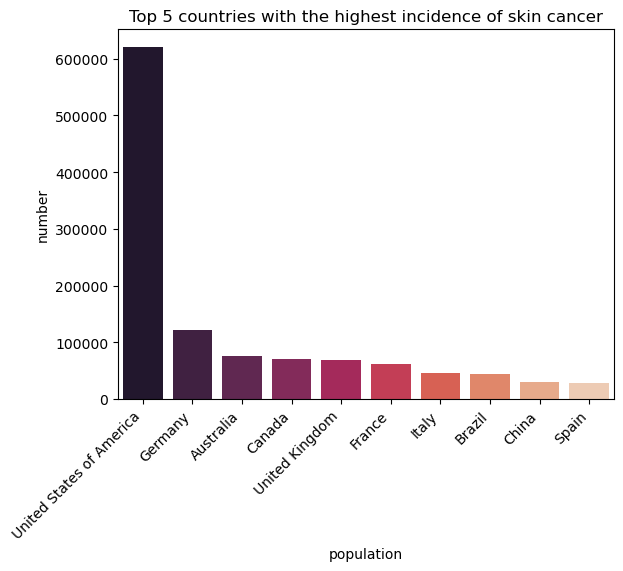

In [116]:
sns.barplot(x = data1_most.population, y = data1_most.number, palette='rocket')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 countries with the highest incidence of skin cancer')

> The results depict a substantial and dramatic incidence for the US in comparison to the second-ranked country. However, upon considering a proportional comparison with the number of inhabitants between the two countries:
>
> For the US: 600,000 cases out of 332,000,000 people, resulting in a rate of 0.0018 or approximately 2 in 1000 people predicted to suffer from skin cancer in 2020.
For the second-ranked country: 100,000 cases out of 83,000,000 people, resulting in a rate of 0.0012 or approximately 1 in 1000 people predicted to suffer from skin cancer in 2020.

#### <font color='orange'>Question 2:</font> 
#### Is the skin cancer incidence growing?

In [130]:
data7_year = data7.groupby('year')['prediction'].sum()

In [147]:
data7_year = data7.pivot_table(index= ['year'], values = ['prediction'], aggfunc = 'sum').reset_index()

In [148]:
data7_year

,year,prediction
0,2020,1517814
1,2025,1699585
2,2030,1899520
3,2035,2112923
4,2040,2309220


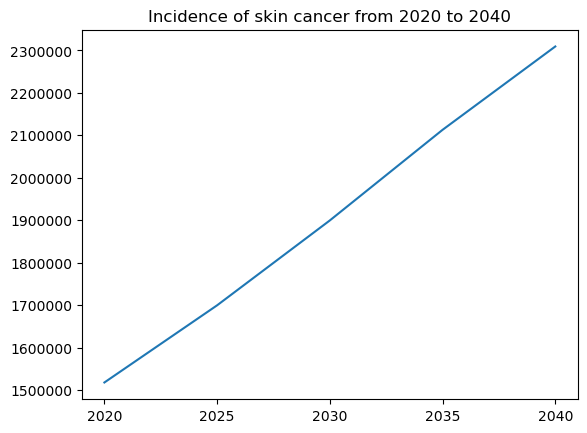

In [153]:
plt.plot(data7_year.year, data7_year.prediction)

plt.xticks(data7_year['year'])

plt.ticklabel_format(style='plain', axis='y')

plt.title('Incidence of skin cancer from 2020 to 2040')

plt.show()

> This graph illustrates a projected increase in the incidence of skin cancer among the population in the future. The calculations have not been done proportionally to the rise in the number of inhabitants, implying that the growth in incidence might be attributed to the increasing global population.